## K-means
http://nbviewer.jupyter.org/github/flothesof/posts/blob/master/20150717_Kmeans.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# vstack(): Stack arrays in sequence vertically (row wise).
# Take a sequence of arrays and stack them vertically to make a single array. 
points = np.vstack([np.random.randn(150, 2) * 0.75 + np.array([1, 0]),
                    np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5]),
                    np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5])])
print(points)

[[ -9.39025649e-02  -1.06566169e-02]
 [  1.92438538e+00  -4.67774524e-01]
 [  1.95697362e+00   3.60680853e-01]
 [  1.30926182e+00  -7.56470231e-01]
 [  7.27863483e-01   7.30186351e-01]
 [  1.90121604e+00  -6.52869380e-01]
 [ -2.60641987e-01  -5.24854490e-01]
 [  1.57069805e+00  -4.38314499e-01]
 [  1.18191561e+00  -4.74442365e-01]
 [  5.55056102e-01  -9.24902903e-02]
 [  5.72902240e-01  -4.07246062e-02]
 [  3.13064324e-01   2.40686588e-02]
 [  1.03987065e+00  -7.49047040e-01]
 [  1.52064851e+00   1.00682157e+00]
 [  1.70763530e+00   4.44006350e-02]
 [  1.18482933e-01  -7.74649540e-02]
 [  4.64066894e-01   8.77051817e-04]
 [ -5.88036079e-01  -4.35781541e-02]
 [  1.32568324e+00  -1.59770467e+00]
 [ -2.50911976e-01  -9.79091787e-01]
 [  6.02125548e-01   1.66027594e-01]
 [  2.24055960e+00  -7.05817837e-02]
 [  2.02995068e-01   1.51768347e+00]
 [ -1.15614332e+00   9.49734056e-01]
 [  1.29413202e+00  -9.88343417e-01]
 [  1.12289252e+00   6.49376251e-01]
 [  1.27081960e+00   1.07462856e-01]
 

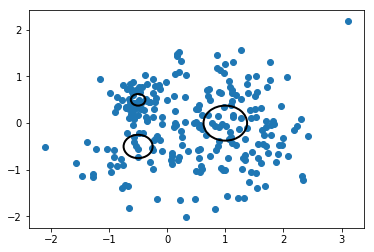

In [3]:
# Plot random generated data
# scatter(x, y)
plt.scatter(points[:, 0], points[:, 1])

# plot hidden centers
ax = plt.gca() # The function gca() returns the current axes.
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=2))

In [4]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [5]:
# Try it out
initialize_centroids(points, 3)

array([[ 1.55695666, -0.74530342],
       [ 1.32568324, -1.59770467],
       [ 0.97526114,  1.06899315]])

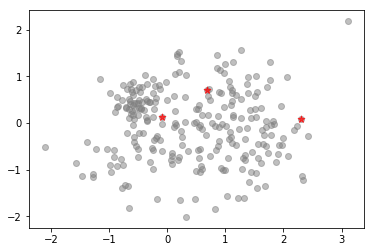

In [6]:
plt.scatter(points[:, 0], points[:, 1], c='grey', alpha=0.5)
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50, marker='*', alpha=0.7)

# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

In [7]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2)) # broadcast
    return np.argmin(distances, axis=0) # Returns the indices of the minimum values along an axis.

In [8]:
# broadcast
print(points.shape)
print(centroids[:, np.newaxis].shape)
print((points - centroids[:, np.newaxis]).shape)
print(points - centroids[:, np.newaxis])

(250, 2)
(3, 1, 2)
(3, 250, 2)
[[[-0.00529934 -0.14792514]
  [ 2.01298861 -0.60504305]
  [ 2.04557685  0.22341233]
  ..., 
  [ 0.23078082 -0.12483598]
  [ 0.34580863 -0.4349396 ]
  [-0.82837409 -0.86351744]]

 [[-0.77062004 -0.72152422]
  [ 1.2476679  -1.17864213]
  [ 1.28025614 -0.35018675]
  ..., 
  [-0.53453988 -0.69843505]
  [-0.41951207 -1.00853868]
  [-1.59369479 -1.43711651]]

 [[-2.40134635 -0.09257863]
  [-0.38305841 -0.54969654]
  [-0.35047017  0.27875884]
  ..., 
  [-2.1652662  -0.06948947]
  [-2.05023839 -0.37959309]
  [-3.22442111 -0.80817093]]]


In [9]:
# Try
c = initialize_centroids(points, 3)
cc = closest_centroid(points, c)
print(c)
print(cc)

[[-0.18694639  0.52817974]
 [ 1.07268015  0.77560391]
 [ 0.73495468  0.48713321]]
[0 1 1 2 2 2 0 2 2 2 2 2 2 1 1 0 2 0 2 0 2 1 0 0 2 1 2 1 2 2 2 2 2 0 2 2 2
 1 2 1 2 0 1 1 2 2 1 2 2 2 0 1 0 2 1 0 2 2 1 2 2 1 2 0 1 1 2 1 2 2 1 1 2 2
 2 1 1 2 1 2 1 2 2 1 1 2 1 2 1 2 1 2 2 2 1 1 0 1 2 2 0 1 0 0 1 0 2 2 1 0 1
 2 1 2 1 2 0 2 1 1 2 0 2 1 0 2 2 1 2 2 1 1 2 2 2 2 2 2 0 2 1 1 2 2 2 1 2 2
 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0]


In [10]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [11]:
new_centroids = move_centroids(points, closest_centroid(points, centroids), centroids)
print(new_centroids)

[[-0.26792887 -0.17199515]
 [ 0.90842494  0.60573545]
 [ 1.73550271 -0.36950847]]


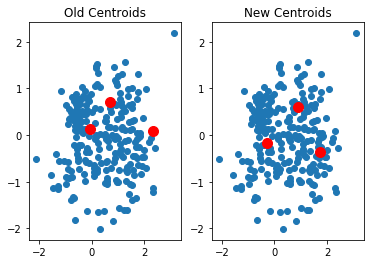

In [12]:
ax = plt.subplot(121)
ax.set_title("Old Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

ax = plt.subplot(122)
ax.set_title("New Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)

### Iteration

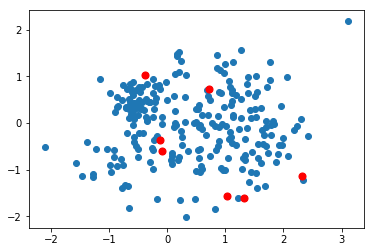

In [13]:
# init
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

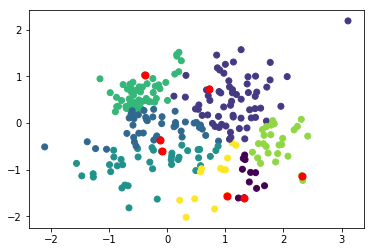

In [14]:
closest = closest_centroid(points, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

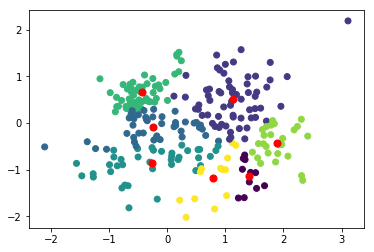

In [15]:
# run this block multiple times to get 'better' centroids

centroids = move_centroids(points, closest, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

### Animation

In [16]:
import ipywidgets
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [17]:
# init
centroids = initialize_centroids(points, 7)
print(centroids)

[[-0.02360418  0.87157331]
 [ 1.33378082 -0.68328381]
 [-0.34385398  0.4770508 ]
 [-0.65365304  0.51897987]
 [ 1.86563051 -0.83263917]
 [ 1.32568324 -1.59770467]
 [-0.23598317 -0.58109496]]


In [18]:
# iter
def f(x):
    global points, centroids, closest
    
    if x == 0: # print init points and random-selected starting points
        plt.scatter(points[:, 0], points[:, 1])
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("print init points and random-selected starting points")
    elif x % 3 == 1: # color the points by the closest centroids
        closest = closest_centroid(points, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("color the points by the closest centroids")
    elif x % 3 == 2: # show the color points only
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.show()
        print("show the color points only")
    else: # find the new centroids
        centroids = move_centroids(points, closest, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("find the new centroids")

In [19]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

ipywidgets.interact(f, x = ipywidgets.FloatSlider(min = 0.0, max = 50.0, step = 1.0, value = 0.0))

<function __main__.f>

### Discussion (K-means and Hierarchical Clustering)

* K-means clustering needs the number of clusters to be speciﬁed.
* K-means assume that clusters have similar density.
* K-means is sensitive to outliers; K-means is sensitive to initial points and local optimal.
* K-means is linear in the number of data objects i.e., O(n), where n is the number of data objects. The time complexity of most of the hierarchical clustering algorithms is quadratic i.e., O(n^2).
* K-means works well when the shape of clusters are hyper-spherical  (or circular in 2 dimensions). If the natural clusters occurring in the dataset are non-spherical then probably K-means is not a good choice.
* K-means starts with a random choice of cluster centers, therefore it may yield different clustering results on different runs of the algorithm. Thus, the results may not be repeatable and lack consistency. However, with hierarchical clustering, you will most definitely get the same clustering results.
* Hierarchical Clustering can give diﬀerent partitionings depending on the level-of-resolution we are looking at.
* No clear consensus on which of the two produces better clustering.
* How the choose K?

In [20]:
# The number of data points in each cluster.

unique, counts = np.unique(closest, return_counts=True)
print(dict(zip(unique, counts)))

{0: 11, 1: 63, 2: 44, 3: 39, 4: 54, 5: 26, 6: 13}
